# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Dataset yang saya gunakan: Pima Indians Diabetes Database**

**Sumber:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Deskripsi:**
Dataset ini berisi data medis wanita Pima Indian berusia minimal 21 tahun untuk
memprediksi kemungkinan diabetes. Dataset berasal dari National Institute of
Diabetes and Digestive and Kidney Diseases.

**Tujuan:**
Memprediksi apakah pasien memiliki diabetes (Outcome=1) atau tidak (Outcome=0)
berdasarkan pengukuran diagnostik tertentu.

**Fitur-fitur:**
1. Pregnancies: Jumlah kehamilan
2. Glucose: Konsentrasi glukosa plasma 2 jam setelah tes toleransi glukosa oral
3. BloodPressure: Tekanan darah diastolik (mm Hg)
4. SkinThickness: Ketebalan lipatan kulit trisep (mm)
5. Insulin: Insulin serum 2 jam (mu U/ml)
6. BMI: Body Mass Index (berat dalam kg/(tinggi dalam m)^2)
7. DiabetesPedigreeFunction: Fungsi silsilah diabetes (riwayat keluarga)
8. Age: Umur (tahun)
9. Outcome: Variable target (1 = diabetes, 0 = tidak diabetes)

**Problem Type:** Binary Classification


In [2]:
#environment
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Eksperimen_SML_Aisyah Ismajati')

Mounted at /content/drive


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv('diabetes_raw.csv')
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
df.columns.tolist()

Jumlah baris: 768
Jumlah kolom: 9


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:
#preview dataset
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Cek missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Glucose              :   5 zeros (0.7%)
BloodPressure        :  35 zeros (4.6%)
SkinThickness        : 227 zeros (29.6%)
Insulin              : 374 zeros (48.7%)
BMI                  :  11 zeros (1.4%)


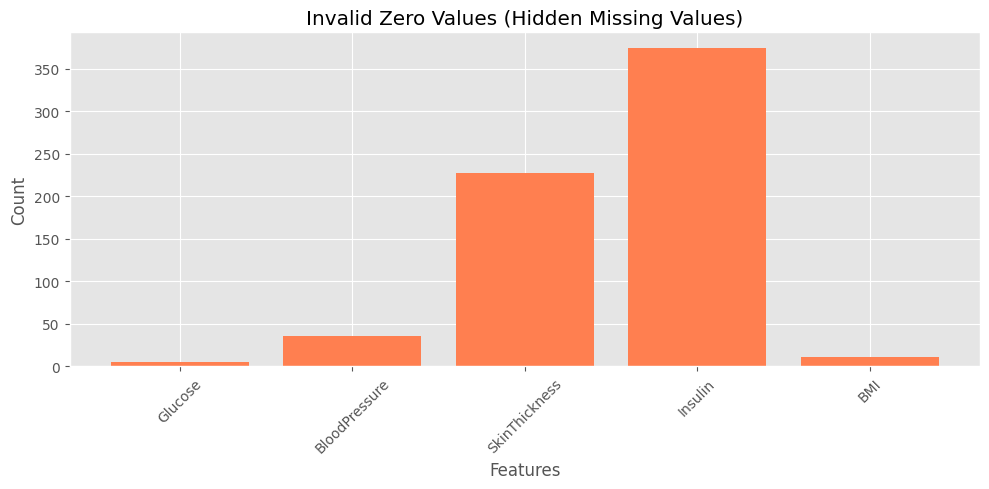

In [7]:
# Cek nilai 0 yang tidak valid (hidden missing values) pada kolom yang tidak boleh 0
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"{col:20} : {zero_count:3} zeros ({zero_pct:.1f}%)")

# Visualisasi missing values
zero_counts = [((df[col] == 0).sum()) for col in cols_with_zeros]

plt.figure(figsize=(10, 5))
plt.bar(cols_with_zeros, zero_counts, color='coral')
plt.title('Invalid Zero Values (Hidden Missing Values)')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Cek data duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


In [9]:
print("Target Distribution")
df['Outcome'].value_counts()

Target Distribution


,count
Outcome,
0,500
1,268


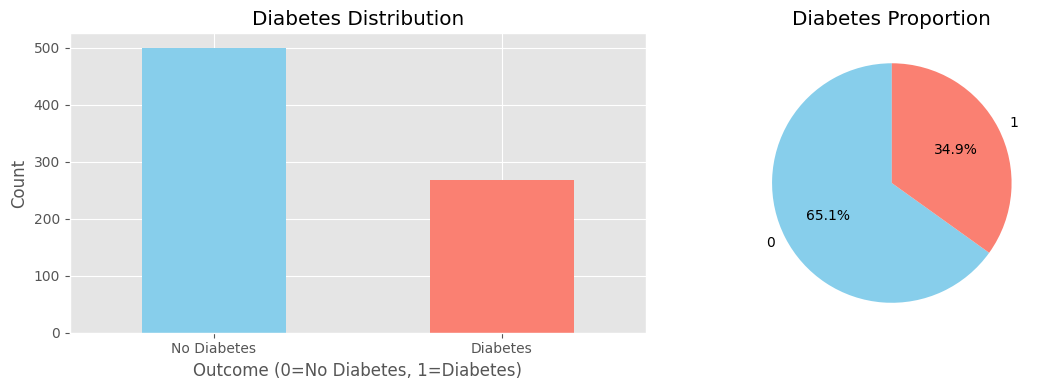

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['Outcome'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Diabetes Distribution')
axes[0].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)

df['Outcome'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                   colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('Diabetes Proportion')

plt.tight_layout()
plt.show()

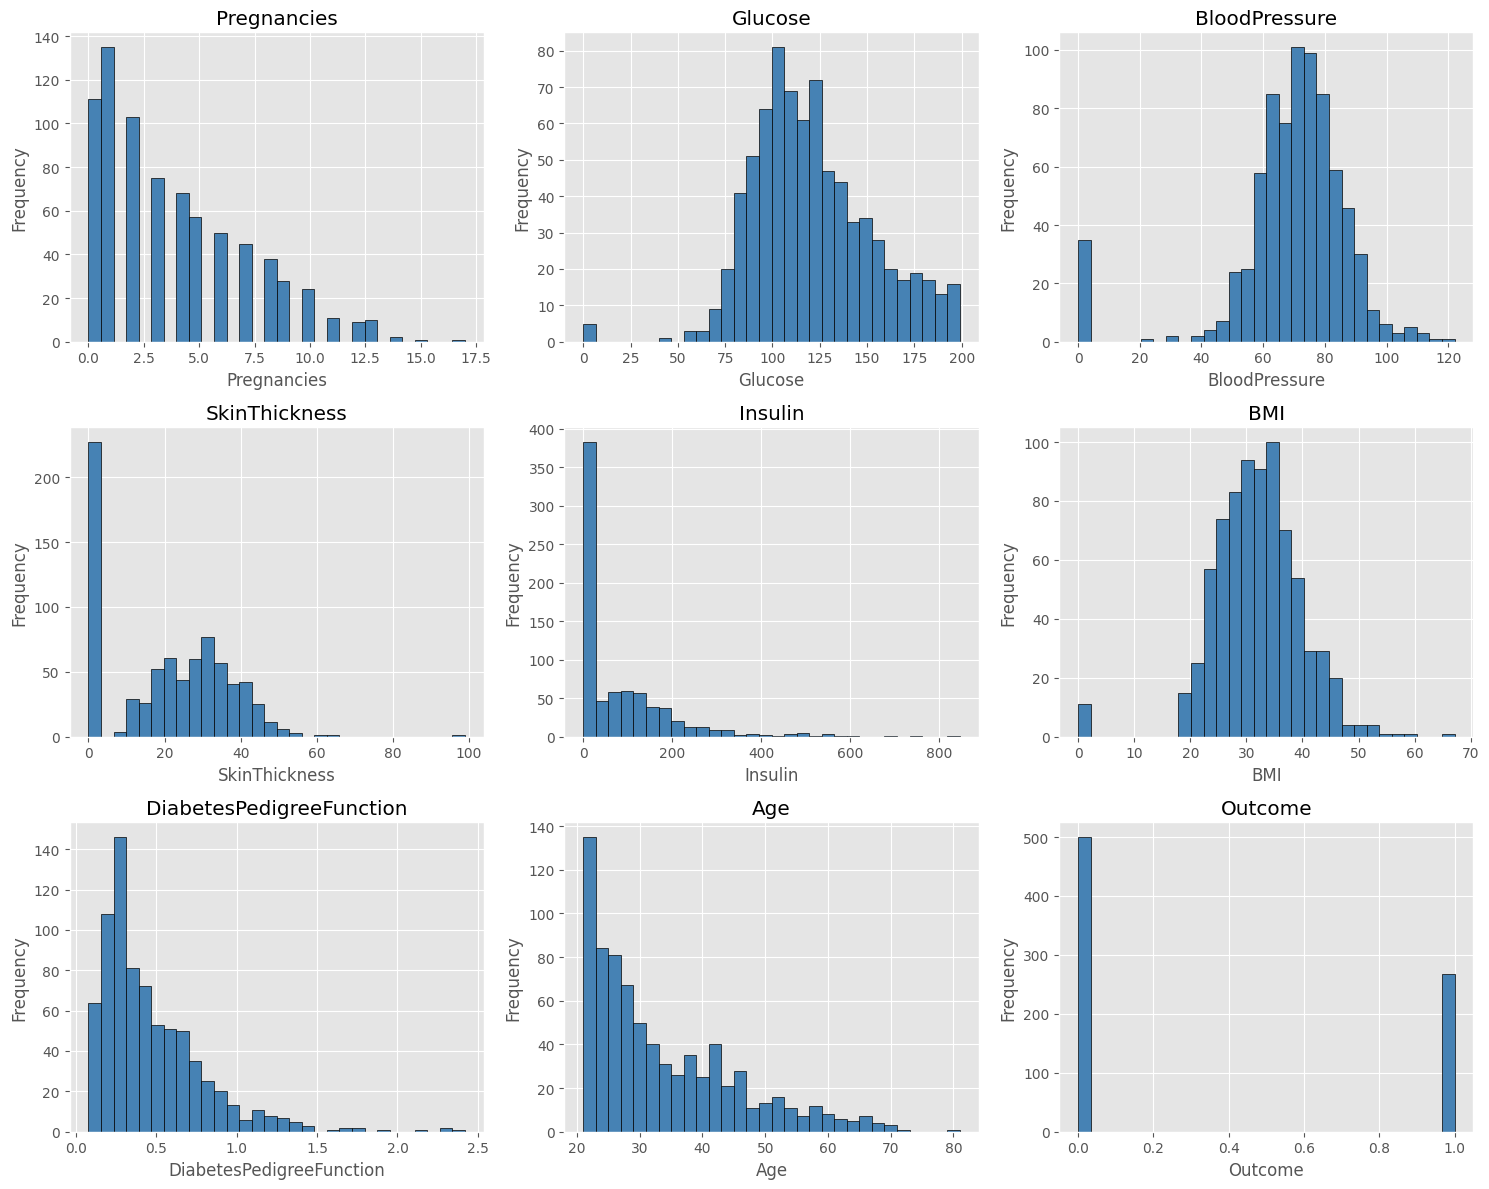

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

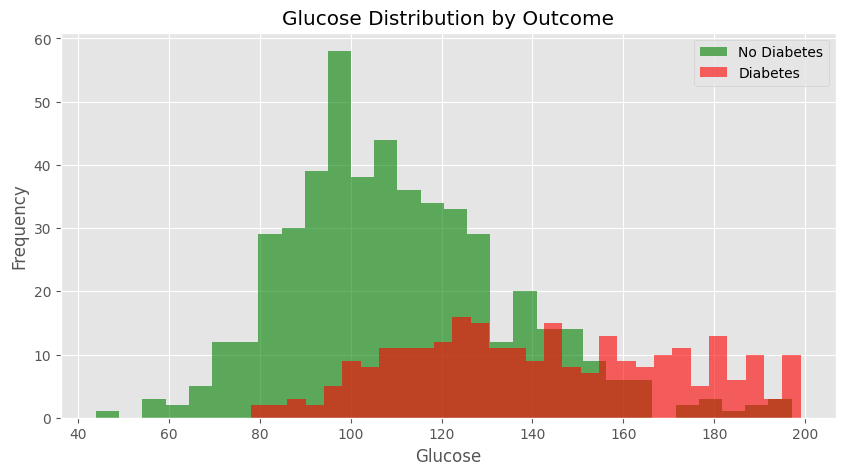

In [12]:
plt.figure(figsize=(10, 5))

#filter out zeros untuk visualisasi lebih baik
df_clean = df[df['Glucose'] > 0]

plt.hist(df_clean[df_clean['Outcome']==0]['Glucose'], bins=30, alpha=0.6, label='No Diabetes', color='green')
plt.hist(df_clean[df_clean['Outcome']==1]['Glucose'], bins=30, alpha=0.6, label='Diabetes', color='red')

plt.title('Glucose Distribution by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()
plt.show()

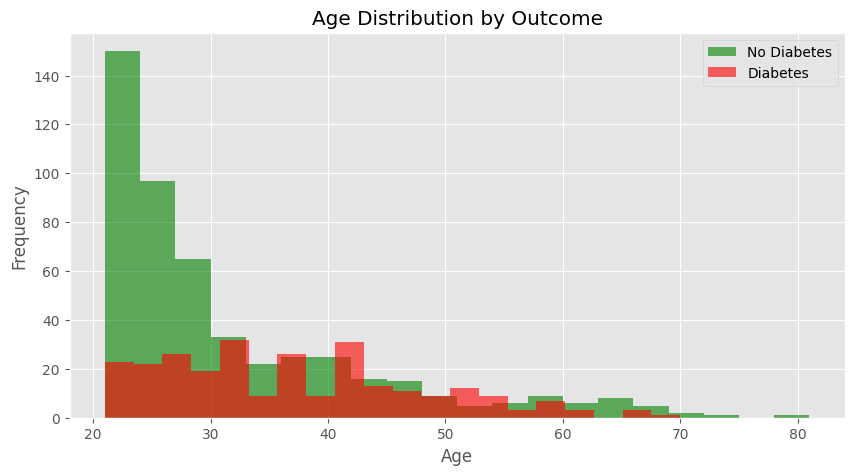

In [13]:
# Distribusi umur berdasarkan target
plt.figure(figsize=(10, 5))

plt.hist(df[df['Outcome']==0]['Age'], bins=20, alpha=0.6, label='No Diabetes', color='green')
plt.hist(df[df['Outcome']==1]['Age'], bins=20, alpha=0.6, label='Diabetes', color='red')

plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

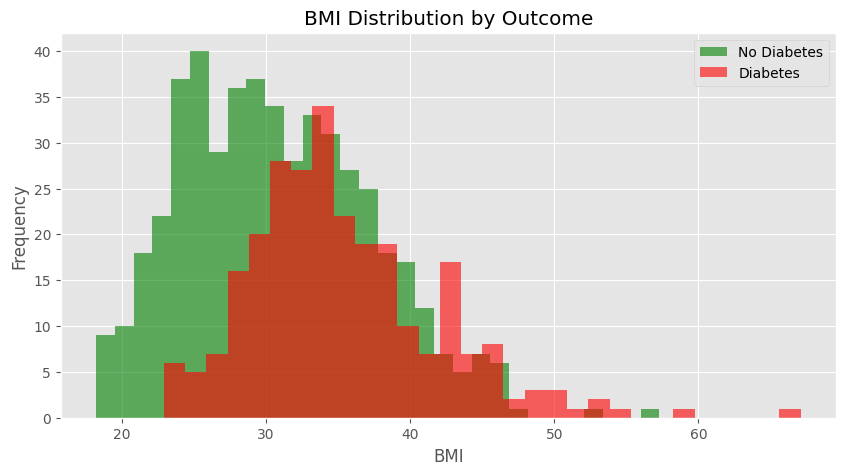

In [14]:
# Analisis BMI
plt.figure(figsize=(10, 5))

df_clean = df[df['BMI'] > 0]

plt.hist(df_clean[df_clean['Outcome']==0]['BMI'], bins=30, alpha=0.6, label='No Diabetes', color='green')
plt.hist(df_clean[df_clean['Outcome']==1]['BMI'], bins=30, alpha=0.6, label='Diabetes', color='red')

plt.title('BMI Distribution by Outcome')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

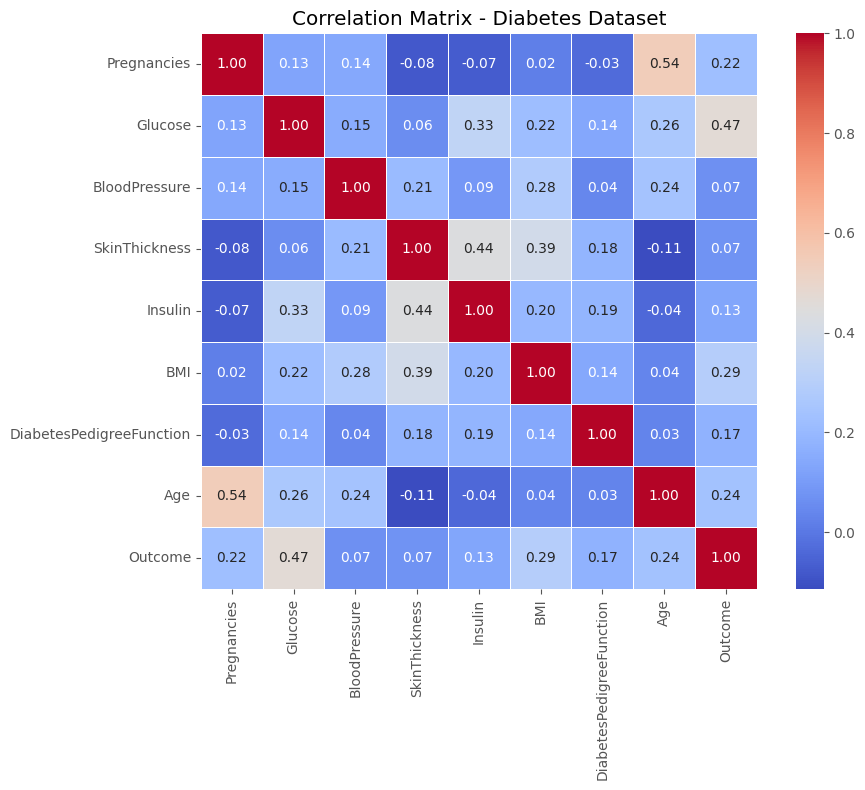

In [15]:
plt.figure(figsize=(10, 8))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Matrix - Diabetes Dataset')
plt.tight_layout()
plt.show()

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


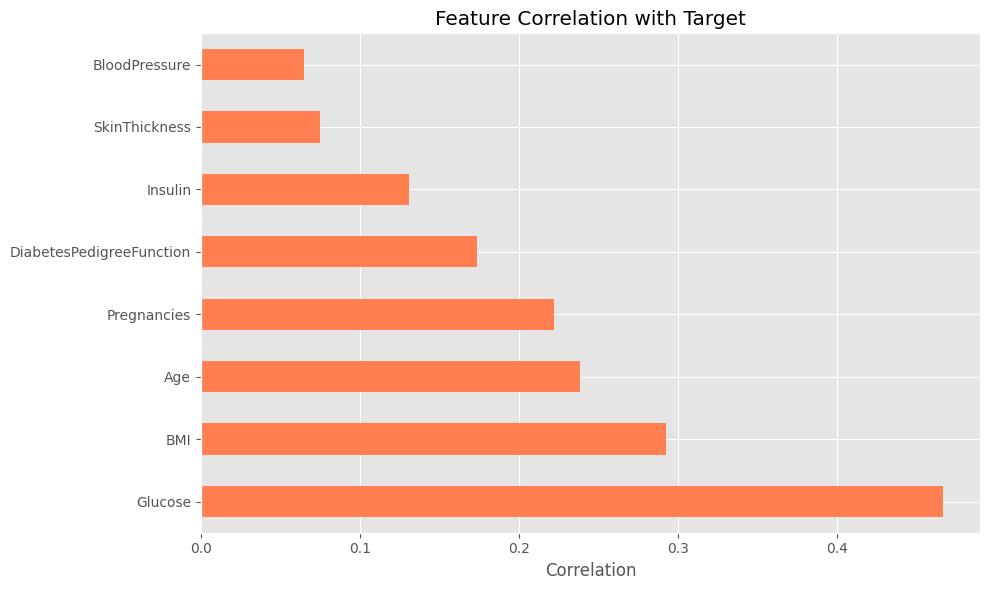

In [16]:
target_corr = df.corr()['Outcome'].sort_values(ascending=False)

print("Correlation with Outcome:")
print(target_corr)

plt.figure(figsize=(10, 6))
target_corr.drop('Outcome').plot(kind='barh', color='coral')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

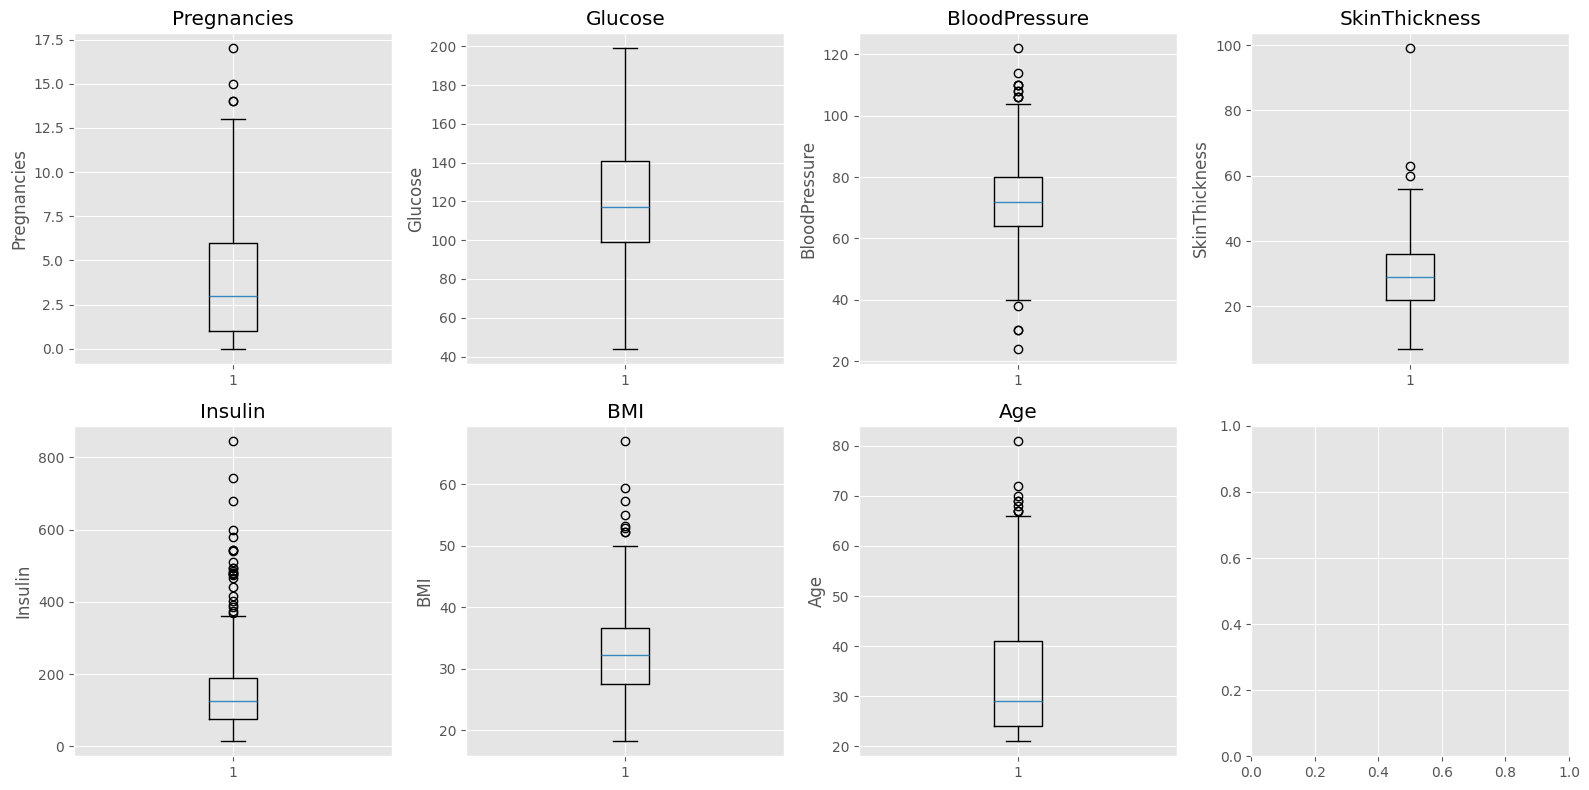

In [17]:
# Deteksi outliers
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    # Filter nilai > 0 untuk visualisasi lebih baik
    data = df[df[col] > 0][col] if col in cols_with_zeros else df[col]
    axes[i].boxplot(data)
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

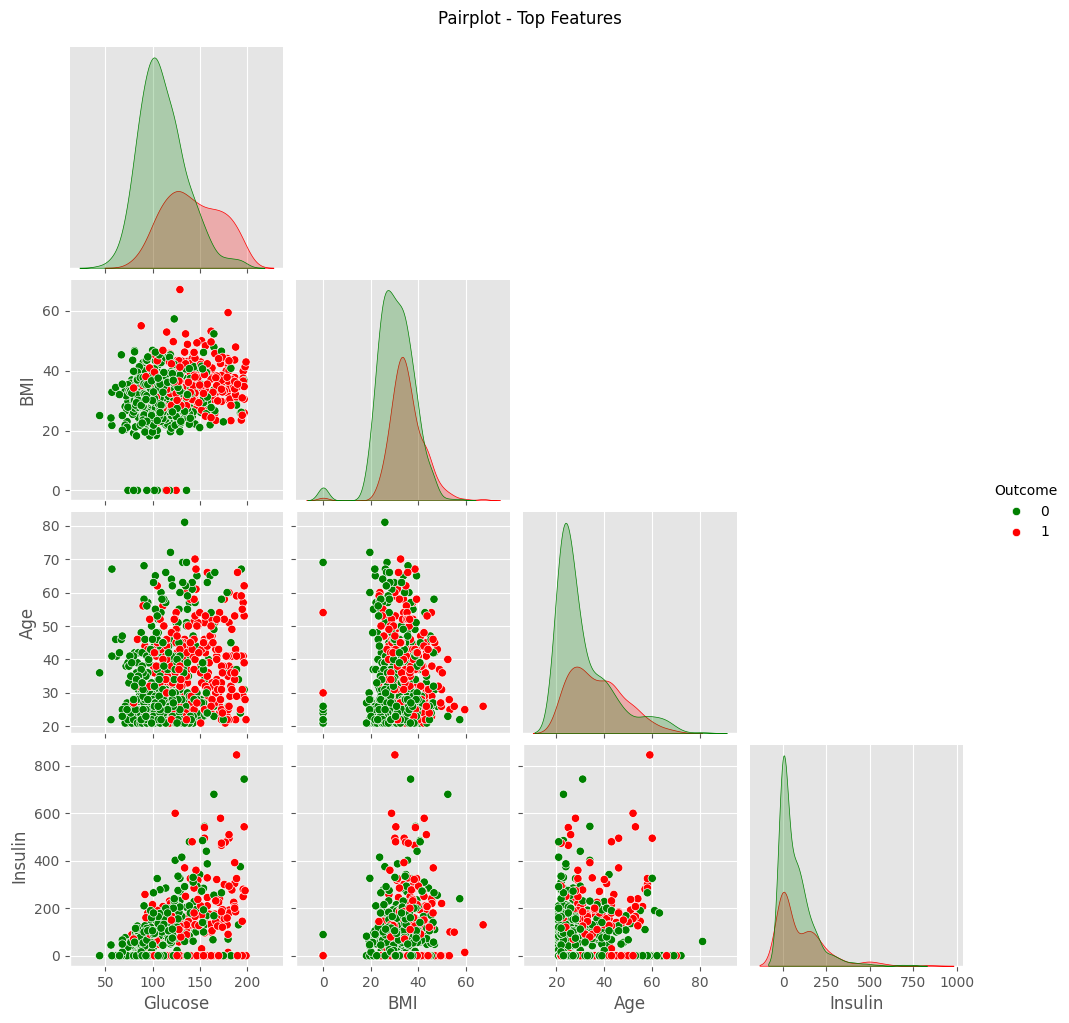

In [18]:
# Pairplot untuk top features (hanya yang valid)
df_for_pair = df[df['Glucose'] > 0].copy()
top_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']

sns.pairplot(df_for_pair[top_features], hue='Outcome', palette={0:'green', 1:'red'}, corner=True)
plt.suptitle('Pairplot - Top Features', y=1.02)
plt.show()

# Summary EDA

## Key Findings:

1. **Missing Values:**
   - Tidak ada NULL values formal
   - Namun terdapat "hidden missing values" berupa nilai 0 yang tidak valid:
     * Glucose: ~5 zeros (impossible)
     * BloodPressure: ~35 zeros (impossible)
     * SkinThickness: ~227 zeros (29.6%)
     * Insulin: ~374 zeros (48.7%)
     * BMI: ~11 zeros (impossible)

2. **Target Distribution:**
   - Dataset imbalanced: 65% No Diabetes, 35% Diabetes

3. **Features Correlation:**
   - Glucose memiliki korelasi tertinggi dengan Outcome (0.47)
   - BMI, Age, dan Pregnancies juga berkorelasi positif

4. **Outliers:**
   - Terdapat beberapa outliers pada kolom Insulin, SkinThickness

5. **Next Steps:**
   - Handle missing values (zeros)
   - Feature scaling
   - Train-test split

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
#Handle missing values

df_processed = df.copy()
# Replace 0 dengan NaN untuk kolom yang tidak boleh 0
for col in cols_with_zeros:
    df_processed[col] = df_processed[col].replace(0, np.nan)

print("After replacing 0 with NaN:")
df_processed.isnull().sum()

After replacing 0 with NaN:


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [20]:
# Impute missing values dengan median
for col in cols_with_zeros:
    median_value = df_processed[col].median()
    df_processed[col].fillna(median_value, inplace=True)
    print(f"{col}: filled with median = {median_value:.2f}")

print("\nAfter imputation:")
df_processed.isnull().sum()

Glucose: filled with median = 117.00
BloodPressure: filled with median = 72.00
SkinThickness: filled with median = 29.00
Insulin: filled with median = 125.00
BMI: filled with median = 32.30

After imputation:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:
# Verify
print("Final check - any missing values?")
df_processed.isnull().sum().sum()

if df_processed.isnull().sum().sum() == 0:
    print("All missing values handled successfully!")

Final check - any missing values?
All missing values handled successfully!


In [22]:
# Split features dan target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {X.columns.tolist()}")

Features shape: (768, 8)
Target shape: (768,)

Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#jumlah
print(f"Training: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

print("\nTarget distribution in train:")
print(y_train.value_counts())

print("\nTarget distribution in test:")
print(y_test.value_counts())

Training: 614 samples (79.9%)
Testing: 154 samples (20.1%)

Target distribution in train:
Outcome
0    400
1    214
Name: count, dtype: int64

Target distribution in test:
Outcome
0    100
1     54
Name: count, dtype: int64


In [24]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"\nTrain scaled shape: {X_train_scaled.shape}")
print(f"Test scaled shape: {X_test_scaled.shape}")


Train scaled shape: (614, 8)
Test scaled shape: (154, 8)


Scaled training data preview:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.851355 -1.056427      -0.826740      -1.918187 -1.203361 -0.769477   
1     0.356576  0.144399       0.477772      -0.229874 -1.470195 -0.417498   
2    -0.549372 -0.556083      -1.152868       1.233330 -0.555335  0.359790   
3    -0.851355  0.811525      -1.315932      -0.004766 -0.161437 -0.402832   
4    -1.153338 -0.889646      -0.663676       1.120776 -0.415565  1.782373   

   DiabetesPedigreeFunction       Age  
0                  0.310794 -0.792169  
1                 -0.116439  0.561034  
2                 -0.764862 -0.707594  
3                  0.262314 -0.369293  
4                 -0.337630 -0.961320  

Scaled data statistics:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  6.140000e+02  6.140000e+02   6.140000e+02   6.140000e+02  6.140000e+02   
mean  -6.943414e-17 -1.099374e-16   3.095606e-16  -3.471707e-17 -4.339634e

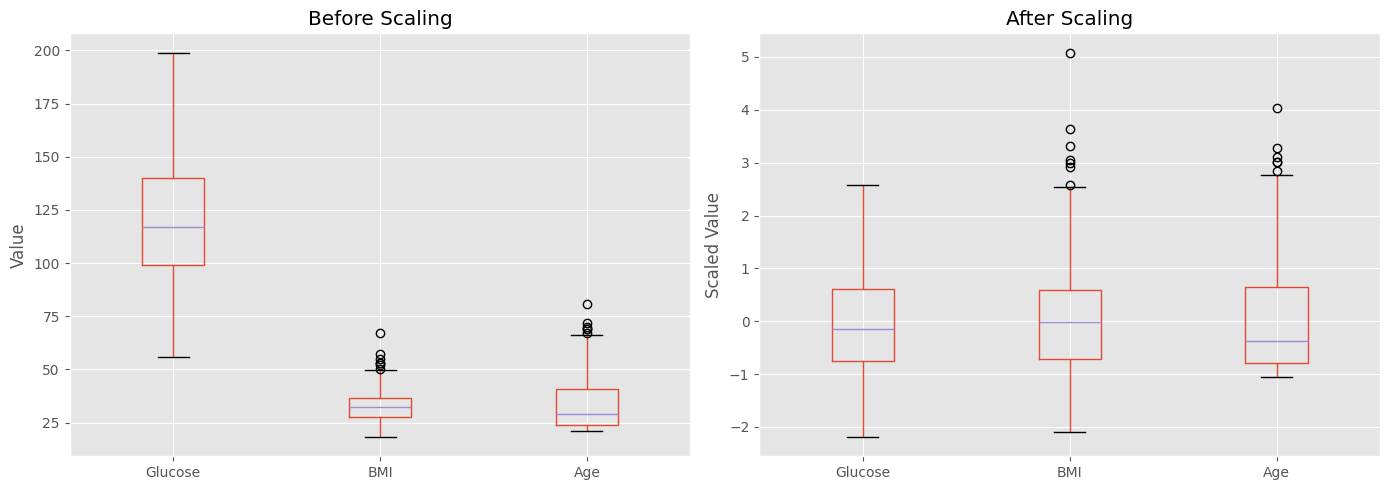

In [25]:
print("Scaled training data preview:")
print(X_train_scaled.head())

print("\nScaled data statistics:")
print(X_train_scaled.describe())

# Visualisasi before-after scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
X_train[['Glucose', 'BMI', 'Age']].boxplot(ax=axes[0])
axes[0].set_title('Before Scaling')
axes[0].set_ylabel('Value')

# After
X_train_scaled[['Glucose', 'BMI', 'Age']].boxplot(ax=axes[1])
axes[1].set_title('After Scaling')
axes[1].set_ylabel('Scaled Value')

plt.tight_layout()
plt.show()

In [26]:
#Save Processed Data
os.makedirs('diabetes_preprocessing', exist_ok=True)

train_final = X_train_scaled.copy()
train_final['Outcome'] = y_train.values

test_final = X_test_scaled.copy()
test_final['Outcome'] = y_test.values

train_final.to_csv('diabetes_preprocessing/diabetes_train.csv', index=False)
test_final.to_csv('diabetes_preprocessing/diabetes_test.csv', index=False)

print("Data saved successfully!")
print(f"Train: diabetes_preprocessing/diabetes_train.csv ({train_final.shape})")
print(f"Test: diabetes_preprocessing/diabetes_test.csv ({test_final.shape})")

Data saved successfully!
Train: diabetes_preprocessing/diabetes_train.csv ((614, 9))
Test: diabetes_preprocessing/diabetes_test.csv ((154, 9))


In [ ]:
#untuk pemanggilan automate
from automate_AisyahIsmajati import preprocess_diabetes_data

train, test = preprocess_diabetes_data(
    input_path="../diabetes_raw.csv",
    output_dir="diabetes_preprocessing"
)

Preprocessing selesai, file berhasil disimpan.
